Data fields
N - ratio of Nitrogen content in soil
P - ratio of Phosphorous content in soil
K - ratio of Potassium content in soil
temperature - temperature in degree Celsius
humidity - relative humidity in %
ph - ph value of the soil
rainfall - rainfall in mm

Libraries Used:
This project utilizes several Python libraries, including Pandas, Numpy, Matplotlib, Seaborn, Sklearn, and others, to process data, perform exploratory data analysis (EDA), and build machine learning models.

Features:
The notebook explores various machine learning techniques for crop recommendation:

Exploratory Data Analysis (EDA)
Feature Engineering
Data Visualization
Baseline Machine Learning Models for Classification such as:
Random Forest
Advance Machine Learning Models for Classification such as:
Neural Network
Notebook Structure:
Import Libraries and Load Data
Import necessary libraries and load the dataset for analysis.
Exploratory Data Analysis (EDA)
Perform a thorough analysis of the data, including descriptive statistics and data distributions.
Data Visualization
Visualize different aspects of the data to understand relationships and patterns.
Model Building
Implement various classification models suitable for the data.
Model Evaluation
Evaluate the performance of each model and compare their effectiveness.
Conclusion and Recommendations
Summarize the findings and propose recommendations based on the model results.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"Fertilizer_Prediction.csv")

In [4]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


(Urea): Contains 37% Nitrogen, 0% Potassium, and 0% Phosphorous.
(DAP): It contains 12% Nitrogen, 0% Potassium, and 36% Phosphorous.
(Fourteen-Thirty Five-Fourteen): It contains 7% Nitrogen, 9% Potassium, and 30% Phosphorous.
(Twenty Eight-Twenty Eight): It contains 22% Nitrogen, 0% Potassium, and 20% Phosphorous.
(Urea): Similar to Row 0, it contains 35% Nitrogen, 0% Potassium, and 0% Phosphorous.

In [5]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [ ]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [7]:
# Basic information about the dataset
print(df.info())

# Statistical summary of the dataset
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB
None
       Temparature  Humidity    Moisture   Nitrogen  Potassium  Phosphorous
count    99.000000  99.000000  99.000000  99.000000  99.000000    99.000000
mean     30.282828  59.151515  43.181818  18.909091   3.383838    18.606061
std       3.502304   5.840331  11.271568  11.599693   5.814667    13.476978
min      25.000000  50.000000  25.000000   4

Exploratory Data Analysis (EDA)
Descriptive Statistics
Continuous Variables
N, P, K are all continuous variables.
Nitrogen (N): Ranges from 0 to 140 with a mean of around 50.55.
Phosphorus (P): Ranges from 5 to 145 with a mean of approximately 53.36.
Potassium (K): Has a wide range from 5 to 205, average near 48.15.
Categorical Variables
Label (fertilizer Type): There are 7 unique types of fertilizers in the dataset.
Next Steps
Data Distributions: Let's visualize the distribution of each feature to understand their spread and identify any skewness or unusual patterns.
Outlier Detection: Using boxplots to visually inspect for outliers in the continuous variables.
Correlation Analysis: Analyze how features correlate with each other.


<Axes: xlabel='Fertilizer Name', ylabel='count'>

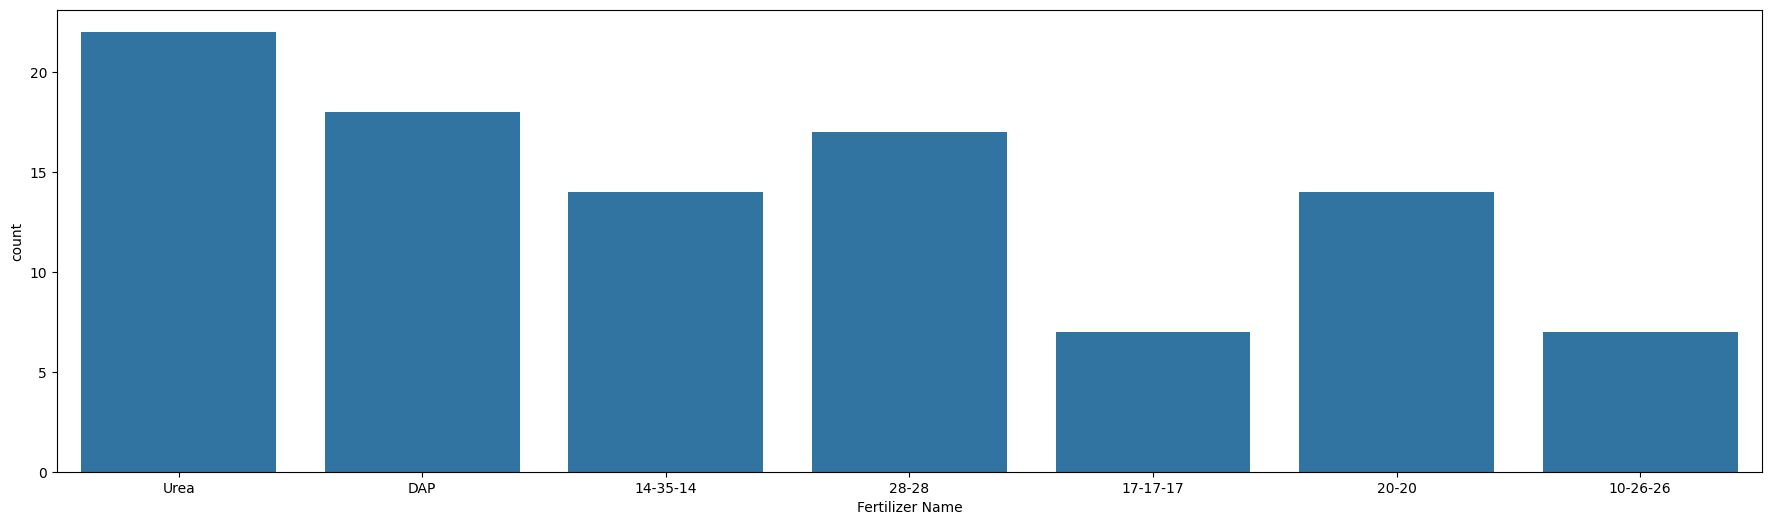

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22,6))
sns.countplot(x='Fertilizer Name', data = df)

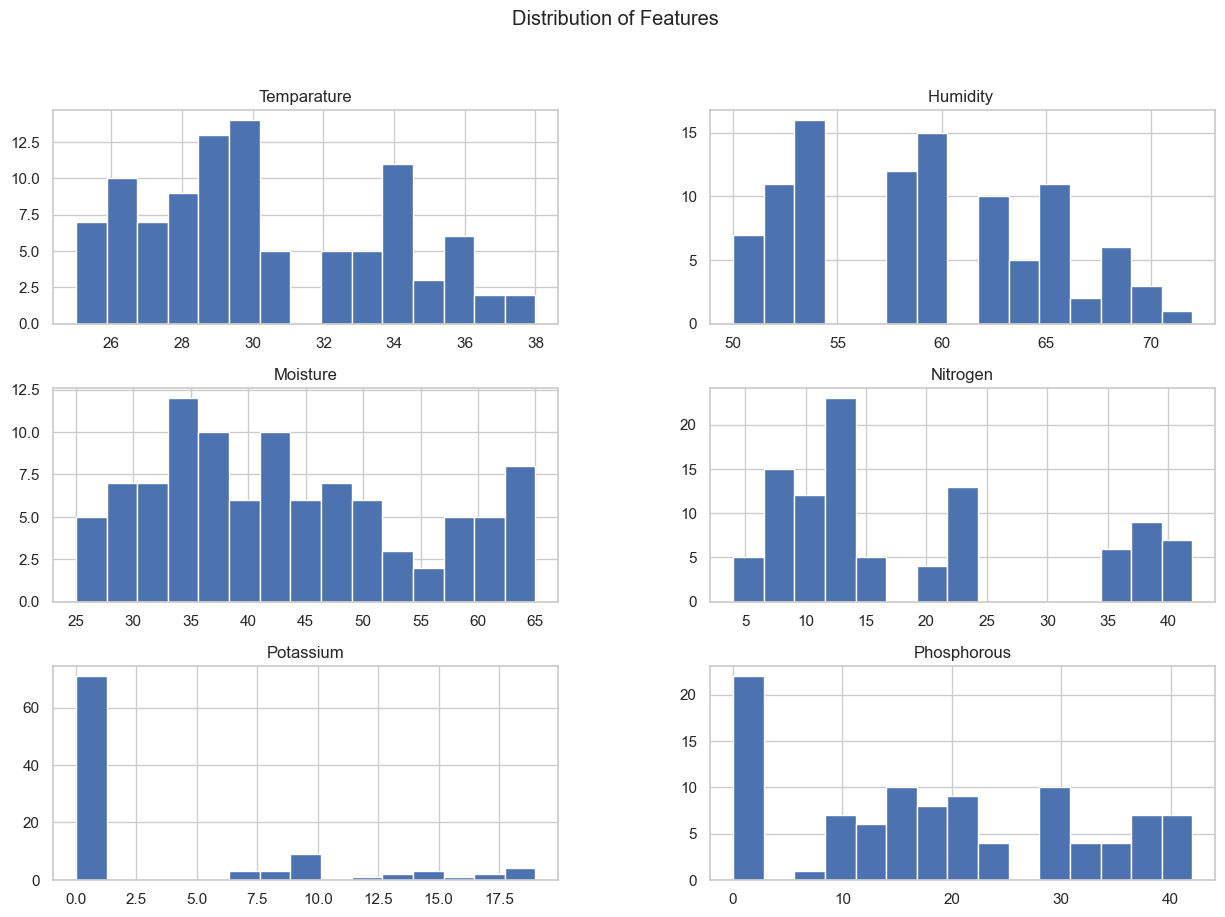

In [9]:
# Setting aesthetics for better readability of plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 8]

# Plotting histograms for each feature
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Features')
plt.show()

Histogram Analysis of Soil Nutrient Data
The image presents a set of histograms depicting the distribution of three key soil nutrients: Nitrogen, Potassium, and Phosphorous. Each histogram provides insights into the frequency distribution of its respective nutrient within the dataset, which is crucial for understanding the soil's composition and informing fertilizer recommendations.

Nitrogen Distribution:
X-axis: Represents the value ranges for Nitrogen content.
Y-axis: Indicates the frequency of occurrences within each Nitrogen range.
Observations: The distribution of Nitrogen shows a somewhat uniform spread across the different value ranges, with no single interval overly dominating the frequency count.
Potassium Distribution:
X-axis: Shows the Potassium value ranges.
Y-axis: Reflects the frequency of occurrences for each Potassium range.
Observations: The histogram for Potassium is left-skewed, meaning a large concentration of samples fall into the lower range of Potassium values, while higher values are much rarer.
Phosphorous Distribution:
X-axis: Represents the value ranges for Phosphorous content.
Y-axis: Indicates the frequency of occurrences within each Phosphorous range.
Observations: The distribution for Phosphorous is more balanced than Potassium but still shows a mild concentration in the lower value ranges, suggesting a variety of Phosphorous levels across the samples.
The visual analysis through these histograms is instrumental in preliminary data examination. For Potassium, the left-skew suggests that most soil samples are deficient in this nutrient. In contrast, Nitrogen and Phosphorous show a more even distribution, which may imply a varied but not extreme range of these nutrients in the soil samples. Such insights are invaluable for developing targeted fertilizer recommendation systems that aim to address specific nutrient deficiencies.

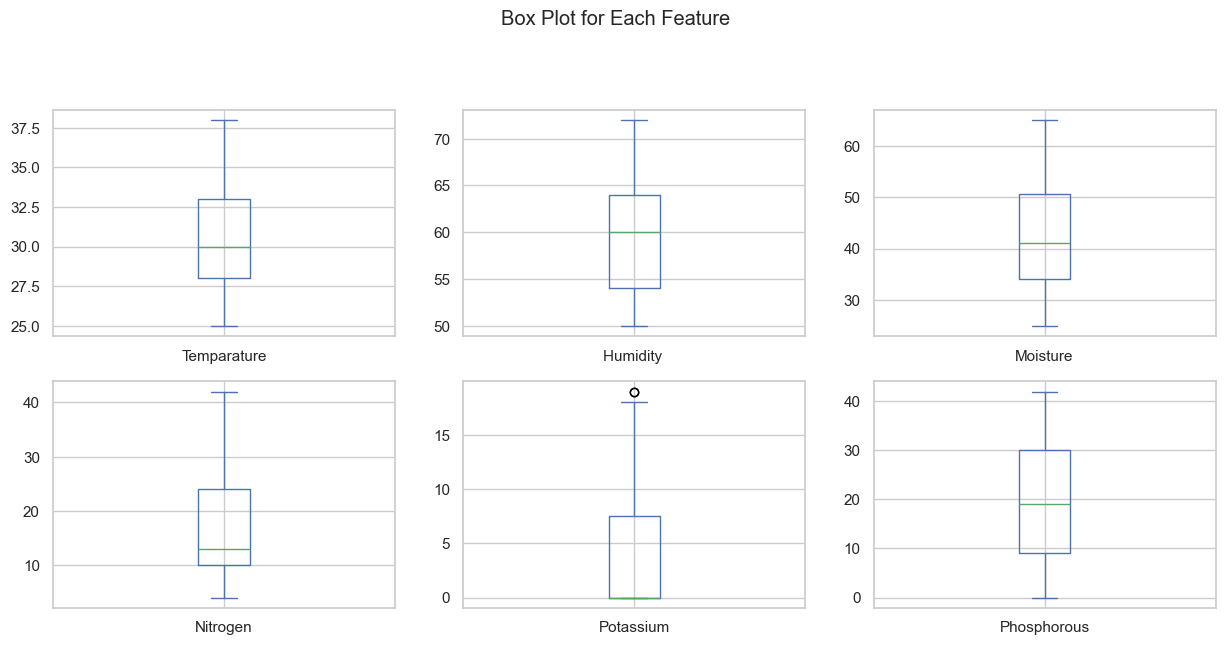

In [10]:
# Box plots for each feature
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15, 10))
plt.suptitle('Box Plot for Each Feature')
plt.show()

Box Plot Analysis for Soil Nutrients
The provided image includes a series of box plots for three key soil nutrients: Nitrogen, Potassium, and Phosphorous. These plots are essential for understanding the distribution of nutrient levels in soil samples or fertilizer compositions.

Nitrogen Box Plot:
The interquartile range (IQR), represented by the box, encapsulates the middle 50% of the Nitrogen data.
The median is the central line in the box, dividing the IQR into two equal parts.
Whiskers extend from the hinges of the box to the highest and lowest values that are within 1.5 * IQR.
There are no outliers present, which suggests a uniform distribution without extreme deviations.
Potassium Box Plot:
The box plot for Potassium shows a similar IQR and median.
An outlier is noticeable, marked by a circle above the upper whisker, indicating an unusual value that stands apart from the rest of the data.
Phosphorous Box Plot:
The IQR and median for Phosphorous are displayed in a similar fashion to the other nutrients.
The distribution of Phosphorous levels appears relatively symmetric around the median.
There are no outliers visible in this plot, indicating a data set with values closely clustered around the median.
These box plots are invaluable for initial data assessment, providing quick insights into the central tendency, variability, and potential outliers in the data. Such visualizations are particularly useful in the preliminary stages of data analysis for a machine learning project focused on fertilizer recommendation.

In [19]:
# Step 1: Drop non-numeric columns
df_numeric = df.drop(columns=['Soil Type', 'Crop Type', 'Fertilizer Name'])

# Step 2: Compute the correlation matrix
corr = df_numeric.corr()

# Step 3: Display the correlation matrix
print(corr)

             Temparature  Humidity   Moisture  Nitrogen  Potassium  \
Temparature     1.000000   0.973164  0.091222 -0.033771  -0.023424   
Humidity        0.973164   1.000000  0.091342 -0.060646  -0.003833   
Moisture        0.091222   0.091342  1.000000 -0.095945   0.027727   
Nitrogen       -0.033771  -0.060646 -0.095945  1.000000  -0.500087   
Potassium      -0.023424  -0.003833  0.027727 -0.500087   1.000000   
Phosphorous     0.207545   0.204044  0.009276 -0.686971   0.089192   

             Phosphorous  
Temparature     0.207545  
Humidity        0.204044  
Moisture        0.009276  
Nitrogen       -0.686971  
Potassium       0.089192  
Phosphorous     1.000000  


<Axes: >

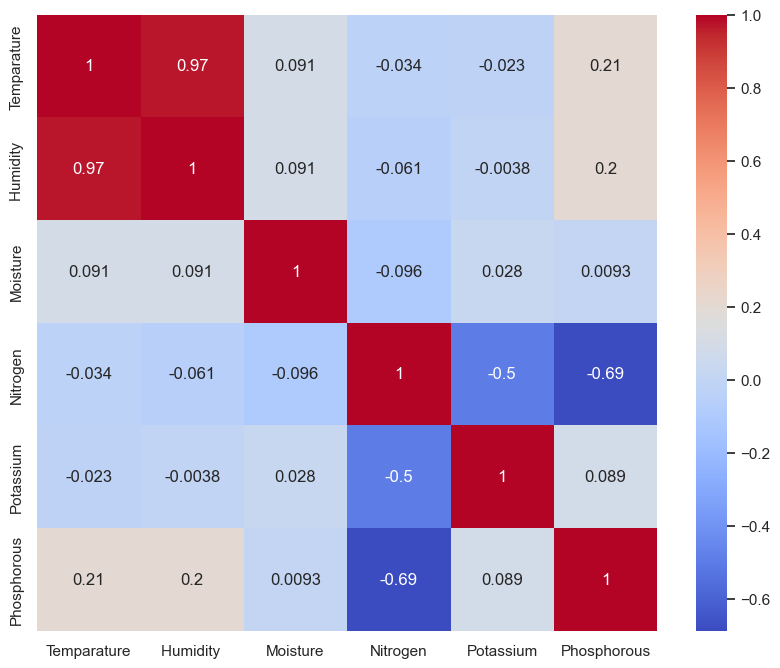

In [20]:
sns.heatmap(corr, annot = True, cbar = True, cmap = 'coolwarm')

Correlation Analysis
The heatmap displays the correlation coefficients between the continuous variables:

Correlation matrix : It shows the strength and direction of the linear relationship between the three features.
A correlation coefficient of 1.0 indicates a perfect positive correlation, meaning that the two features are perfectly in sync.
A correlation coefficient of -1.0 indicates a perfect negative correlation, meaning that the two features are perfectly opposed.
A correlation coefficient of 0.0 indicates no correlation, meaning that there is no linear relationship between the two features.
In this case, we can see that there is a negative correlation between nitrogen and potassium, and between nitrogen and phosphorous. This means that as the amount of nitrogen increases, the amount of potassium and phosphorous tends to decrease. There is a positive correlation between potassium and phosphorous, meaning that as the amount of potassium increases, the amount of phosphorous tends to increase.

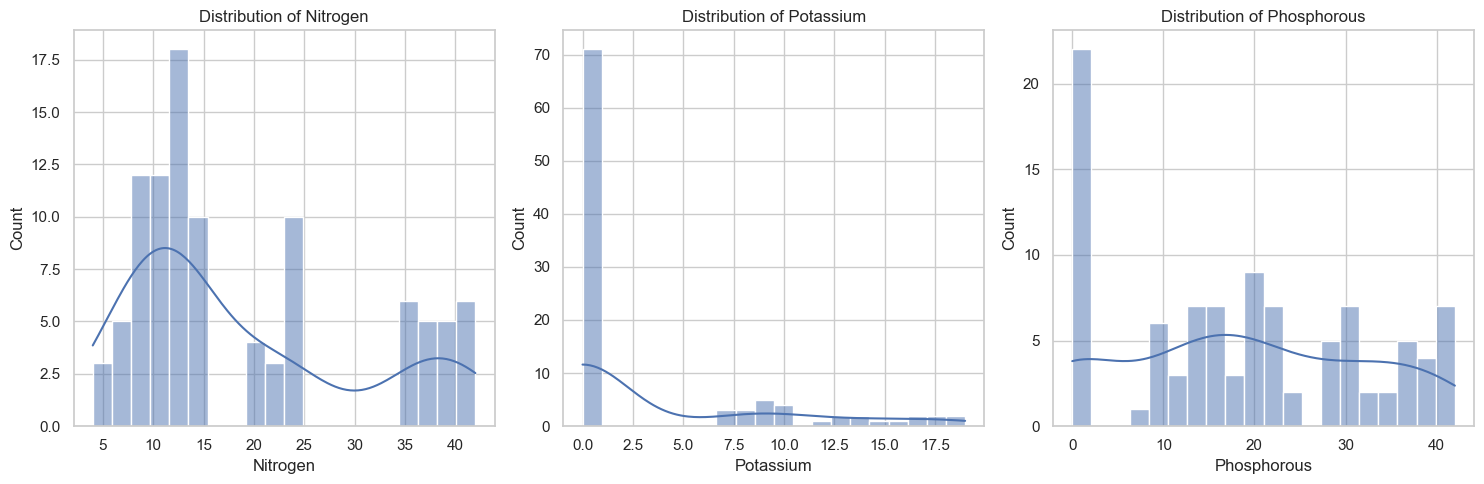

In [22]:
# Plotting the distribution graphs of the variables
plt.figure(figsize=(15, 5))

# Enumerating through each numeric column for distribution plot
for i, column in enumerate(['Nitrogen', 'Potassium', 'Phosphorous'], start=1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Removing the non-numeric column for correlation analysis
numeric_data = df.drop('Fertilizer Name', axis=1)

Histograms with Kernel Density Estimation
The output displays histograms for three key variables: Nitrogen, Potassium, and Phosphorous. These histograms are vital for understanding the distribution of each nutrient in the dataset.

Observations:
Nitrogen:

The histogram exhibits a multimodal distribution with several peaks, suggesting multiple common values of Nitrogen in the dataset.
The KDE line shows these modes as peaks in the probability density, indicating clusters of data points.
Potassium:

The distribution of Potassium is highly skewed towards the lower end, with a sharp peak at the lowest bin.
This skewness is evident in the KDE curve, which has a steep drop-off as the values increase.
Phosphorous:

Phosphorous levels are more evenly spread across the range, with a slight concentration at the lower end.
The KDE curve for Phosphorous is flatter than that of Potassium, suggesting less skewness in the data.
Interpretation:
These visualizations are crucial for the initial data analysis phase. The distribution patterns of Nitrogen, Potassium, and Phosphorous can influence how we approach data preprocessing and model building in the context of fertilizer recommendation. For instance, the skewness in Potassium might necessitate data transformation for certain modeling techniques, while the multimodal nature of Nitrogen could point to different types of soil or crop needs within the dataset.